# Simple Linear Regression
Here we will create the first simple linear regression model to predict the sales.

## Step 1: Reading and understanding the data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lib for models building
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
advertising_csv = 'data/advertising.csv'

In [4]:
df = pd.read_csv(advertising_csv)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#1. Get first idea about it
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#2. Check the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All values are not null.

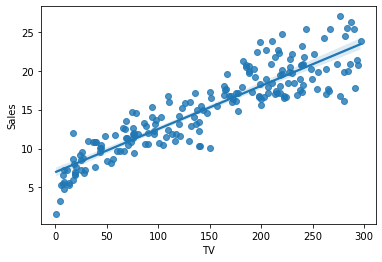

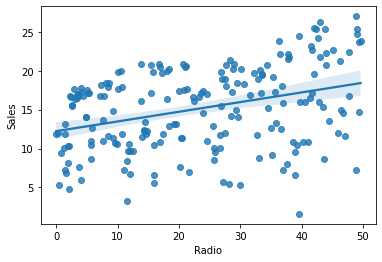

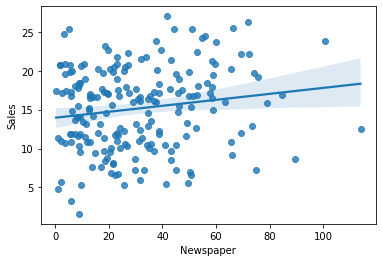

Together:


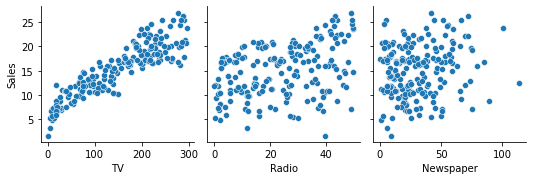

In [7]:
#Visualise the data for linear regression model
sns.regplot(x="TV", y="Sales", data=df)
plt.show()
sns.regplot(x="Radio", y="Sales", data=df)
plt.show()
sns.regplot(x="Newspaper", y="Sales", data=df)
plt.show()
#Or together we can plot
print("Together:")
sns.pairplot(x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], data=df)
plt.show()

### Conclusion:
1. TV and Sales and good +ve correlation.
2. Radio and Newspaper are more scatter. And still has little +ve corelation.

In [8]:
#Another way to visualise the correlation between parameters is HeatMap
df.corr() #In the form of table.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


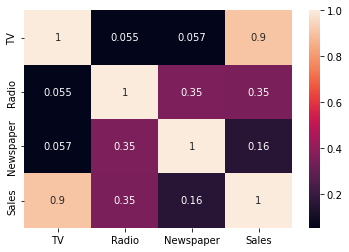

In [9]:
sns.heatmap(df.corr(), annot=True) #In the form of visulisation
plt.show()

### Conclusion:
1. Here we can see that the TV and Sales has very high correlation.

## Step 2: Perform Simple Linear Regression
Equation of linear regression
#### y = mx + c

- Here m and c are the model parameters or coefficients. Because it's used in model building.

## Steps to create the linear regression model:
1. Get x and y
2. Separate train and test data sets. (70-30 or 80-20)
3. Train your model on the training sets. (Get your models coefficients.)
4. Evaluate the model on test sets.

In [10]:
df = pd.read_csv(advertising_csv)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 1. Get x and y

In [29]:
x = df['TV']
y = df['Sales']

## 2. Separate the training and testing data sets

In [28]:
#2. Separate the training and testing data sets. (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100) 
#Randomly select the 70% data.
#Here random_state=100 is used to generate every time same random data. If we change this value, it will generate other random values.

In [13]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

## 3. Training the model
### Model:  Sales = const + m*TV

In [17]:
# Here the statsmodels library does not include the const (Intersect). But we can not ignore it.
# Here we need to explicitly add this constant.
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


- Here const added as 1.0 for all TV values.

In [18]:
# Now fitting the model (Ordinary Least Square)
lr_model = sm.OLS(y_train, x_train_sm).fit()

In [19]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

- Here const = 6.94 and m = 0.054
### So: sales = 6.94 + 0.054*tv

This is the model.

In [21]:
#We can get more summary of model params. This detailed summary we can not get by sklearn lib.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        21:33:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Important points:
Here in summary we check the below points.
1. coefficient (coef): It's saying that TV has 0.054 +ve coefficient.
2. P-Value (P>|t|): It's zero or very low. Means the coefficient has very good significants in model.
3. R-Squared: It's shows how much percentage of variance are covered in model. Here it's 81.6% which is very good.
4. Prob (F-statistic): If it's low, then it means the fit is not by chance. It's actually very good fit. 
    - Here it is very low (0.0152 [It is near to zero]), means model are good and 81% is not by chance. 
    - F-Statistic tells overall model fit is significant or not.
    - If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant.
    



## 4. Evaluate the model

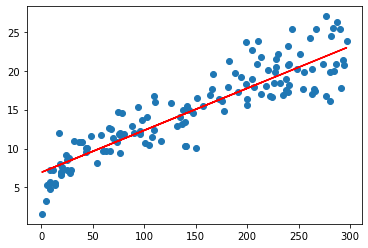

In [27]:
#First draw the train data sets and generated models line (In red color).
plt.scatter(x_train, y_train) #This draw a actual training data set scatter plot in blue dots.
plt.plot(x_train, (6.948 + 0.054*x_train), 'r') #This will draw created model line (y values) for x training value.
plt.show()

Note:
- Here we can see that the model line in red color looks good fit with training sets.

## Residual Analysis:
- Residual: Difference between the actual and predicted y value. It is also called error terms.


There were two assumptions which we did befor model building.
1. The error terms should be normally distributed with mean equal to 0.
2. The error terms should be independent of each other.

We need to check verify that both assumptions should not be violated by model.

#### 1. Check assumption 1

In [39]:
# To check 1st assumption, we just plot a histogram of the error terms.
# And check whether they are normally distributed.
#error term = y_train - y_model_predicated
y_model_predicated = lr_model.predict(x_train_sm)
y_model_predicated.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [32]:
residual = y_train - y_model_predicated

/Users/ramesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

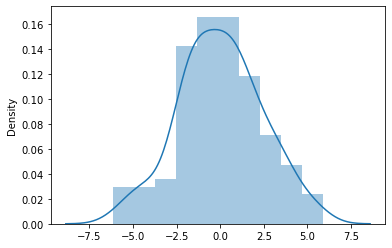

In [38]:
#plot the histogram of residual
sns.distplot(residual)

Notes:
- Here we can see that the plot has middle value 0.
- Also the shape looks like normaly distributed.
### So we can conclude that the error terms are normally distributed.

#### 2. Check assumption 2

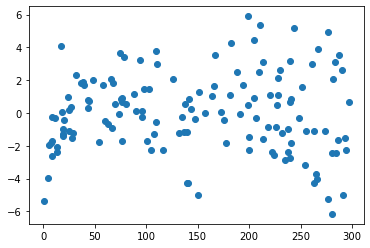

In [41]:
# To check it we need to plot the error terms, this time with either of X or y to check for any patterns.
# Looks for the patterns in residual and there should not be identify any pattern.
plt.scatter(x_train, residual)

Note:
- There is no pattern between x_train and residual.

### So no patterns.

## 5. Predictions and Evaluation on the Test Set

In [45]:
#1. Predict the y_test_pred by model.
#2. Evaluate the prediction.

In [46]:
#Add constant
x_test_sm = sm.add_constant(x_test)

In [50]:
#Pred y
y_test_pred = lr_model.predict(x_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [53]:
#Evalute by r-squred (from sklearn.metrics import r2_score)
r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

- Here the r-squred is 79.2% which is very good.

In [54]:
#Evaluate by mean squared error. (from sklearn.metrics import mean_squared_error)
mean_squared_error(y_test, y_test_pred)

4.077556371826956

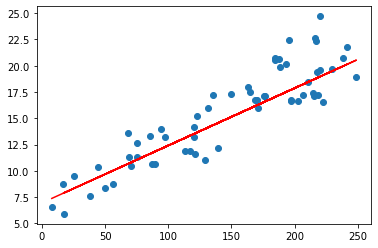

In [56]:
#Evaluate by visualise
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')

# ---------------X-------------------

# Linear Regression Using sklearn
It is a go to package for machine learning and building model.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100)
#reshape x_train to (140, 1)
x_train_lm = x_train.values.reshape(-1, 1)
x_test_lm = x_test.values.reshape(-1, 1)
x_train_lm.shape

(140, 1)

In [64]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_lm, y_train)

LinearRegression()

In [66]:
#Find the coef
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [67]:
#Make predictions
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

In [71]:
#Evaluate the model
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8157933136480388
0.792103160124566
